In [1]:
import os; os.environ['CUDA_VISIBLE_DEVICES'] = "3"

In [2]:
import tensorflow; import keras

Using TensorFlow backend.


In [3]:
tensorflow.__version__

'1.2.0'

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
%matplotlib inline

# Preprocessing the data

In [5]:
BASE_PATH = "/afs/csail.mit.edu/u/j/jains/6869-places"
DATA_PATH = os.path.join(BASE_PATH, 'data/images/')

## Train Data
The `data/images/train/` tree is organized like this: `<first_char>/<category_name>/<subcategory>`. This folder structure needs to be flattened to just `<category_name>`.
So for example:
```
train/
    s/
        subway_station/
            platform/
                1.jpg
                ...
```
needs to be turned into
```
train/
    subway_station-platform/
        1.jpg
```
for all categories. This is to make it easier for Keras' ImageDataGenerator.flow_from_directory() to identify the categories automatically.

In [6]:
TRAIN_PATH = os.path.join(DATA_PATH, "train/")

categories = os.listdir(TRAIN_PATH)
len(categories), categories

(100,
 ['fire_station',
  'kitchen',
  'abbey',
  'racecourse',
  'valley',
  'track-outdoor',
  'harbor',
  'office',
  'iceberg',
  'palace',
  'yard',
  'laundromat',
  'campsite',
  'shed',
  'gas_station',
  'market-outdoor',
  'badlands',
  'lighthouse',
  'dam',
  'desert-sand',
  'dining_room',
  'driveway',
  'airport_terminal',
  'amphitheater',
  'amusement_park',
  'aquarium',
  'aqueduct',
  'art_gallery',
  'assembly_line',
  'auditorium',
  'bakery-shop',
  'ballroom',
  'bamboo_forest',
  'banquet_hall',
  'bar',
  'baseball_field',
  'bathroom',
  'beauty_salon',
  'bedroom',
  'boat_deck',
  'bookstore',
  'botanical_garden',
  'bowling_alley',
  'boxing_ring',
  'bridge',
  'bus_interior',
  'butchers_shop',
  'candy_store',
  'canyon',
  'cemetery',
  'chalet',
  'church-outdoor',
  'classroom',
  'clothing_store',
  'coast',
  'cockpit',
  'coffee_shop',
  'conference_room',
  'construction_site',
  'corn_field',
  'corridor',
  'courtyard',
  'food_court',
  'foun

## Validation Data
The `data/val` tree is organized as a bunch of unlabeled jpgs. Process this into the same structure as you did the training data.

In [7]:
VAL_PATH = os.path.join(DATA_PATH, "val/")
VAL_LABEL_PATH = os.path.join(BASE_PATH, "development_kit/data/val-mine.txt")

In [8]:
cat_num_to_name = {}

CATEGORIES_PATH = os.path.join(BASE_PATH, "development_kit/data/categories.txt")
with open(CATEGORIES_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        label = row[0]
        parts = row[0].split('/')
        if len(parts) > 3:
            label = parts[2] + '-' + parts[3]
        else:
            label = parts[2]
        cat_num_to_name[int(row[1])] = label

# Check categories match exactly with train categories
assert set(cat_num_to_name.values()) == set(categories)

cat_num_to_name

{0: 'abbey',
 1: 'airport_terminal',
 2: 'amphitheater',
 3: 'amusement_park',
 4: 'aquarium',
 5: 'aqueduct',
 6: 'art_gallery',
 7: 'assembly_line',
 8: 'auditorium',
 9: 'badlands',
 10: 'bakery-shop',
 11: 'ballroom',
 12: 'bamboo_forest',
 13: 'banquet_hall',
 14: 'bar',
 15: 'baseball_field',
 16: 'bathroom',
 17: 'beauty_salon',
 18: 'bedroom',
 19: 'boat_deck',
 20: 'bookstore',
 21: 'botanical_garden',
 22: 'bowling_alley',
 23: 'boxing_ring',
 24: 'bridge',
 25: 'bus_interior',
 26: 'butchers_shop',
 27: 'campsite',
 28: 'candy_store',
 29: 'canyon',
 30: 'cemetery',
 31: 'chalet',
 32: 'church-outdoor',
 33: 'classroom',
 34: 'clothing_store',
 35: 'coast',
 36: 'cockpit',
 37: 'coffee_shop',
 38: 'conference_room',
 39: 'construction_site',
 40: 'corn_field',
 41: 'corridor',
 42: 'courtyard',
 43: 'dam',
 44: 'desert-sand',
 45: 'dining_room',
 46: 'driveway',
 47: 'fire_station',
 48: 'food_court',
 49: 'fountain',
 50: 'gas_station',
 51: 'golf_course',
 52: 'harbor',
 5

In [9]:
filename_to_category = {}

with open(VAL_LABEL_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        filename_to_category[row[0]] = int(row[1])
        
filename_to_category

{'00007701.jpg': 91,
 '00004536.jpg': 97,
 '00002143.jpg': 96,
 '00006734.jpg': 12,
 '00001547.jpg': 69,
 '00007863.jpg': 62,
 '00004074.jpg': 69,
 '00004029.jpg': 27,
 '00003293.jpg': 85,
 '00001657.jpg': 14,
 '00001267.jpg': 20,
 '00007776.jpg': 65,
 '00006407.jpg': 18,
 '00007361.jpg': 4,
 '00007448.jpg': 11,
 '00009424.jpg': 14,
 '00004463.jpg': 44,
 '00007481.jpg': 41,
 '00000028.jpg': 49,
 '00002179.jpg': 12,
 '00009160.jpg': 60,
 '00006951.jpg': 12,
 '00007679.jpg': 32,
 '00007778.jpg': 7,
 '00009720.jpg': 46,
 '00005743.jpg': 33,
 '00008077.jpg': 97,
 '00001240.jpg': 73,
 '00006141.jpg': 16,
 '00009565.jpg': 3,
 '00003353.jpg': 92,
 '00007214.jpg': 98,
 '00001784.jpg': 19,
 '00000682.jpg': 1,
 '00000067.jpg': 84,
 '00006750.jpg': 80,
 '00000220.jpg': 92,
 '00005278.jpg': 73,
 '00001973.jpg': 82,
 '00005329.jpg': 7,
 '00004115.jpg': 52,
 '00009149.jpg': 46,
 '00007221.jpg': 0,
 '00008781.jpg': 84,
 '00002763.jpg': 38,
 '00002762.jpg': 33,
 '00002055.jpg': 51,
 '00002286.jpg': 29

In [10]:
filename_to_name = {}

for filename, cat in filename_to_category.items():
    filename_to_name[filename] = cat_num_to_name[cat]

filename_to_name

{'00004536.jpg': 'valley',
 '00002143.jpg': 'trench',
 '00006734.jpg': 'bamboo_forest',
 '00001547.jpg': 'museum-indoor',
 '00007863.jpg': 'living_room',
 '00004074.jpg': 'museum-indoor',
 '00004325.jpg': 'construction_site',
 '00004029.jpg': 'campsite',
 '00003293.jpg': 'skyscraper',
 '00001657.jpg': 'bar',
 '00001267.jpg': 'bookstore',
 '00007776.jpg': 'market-outdoor',
 '00006407.jpg': 'bedroom',
 '00007361.jpg': 'aquarium',
 '00007448.jpg': 'ballroom',
 '00009424.jpg': 'bar',
 '00004463.jpg': 'desert-sand',
 '00007481.jpg': 'corridor',
 '00001435.jpg': 'office',
 '00000028.jpg': 'fountain',
 '00002179.jpg': 'bamboo_forest',
 '00009160.jpg': 'laundromat',
 '00006951.jpg': 'bamboo_forest',
 '00003271.jpg': 'bookstore',
 '00007778.jpg': 'assembly_line',
 '00003807.jpg': 'shed',
 '00005743.jpg': 'classroom',
 '00003526.jpg': 'fire_station',
 '00002815.jpg': 'candy_store',
 '00001240.jpg': 'phone_booth',
 '00009565.jpg': 'amusement_park',
 '00003353.jpg': 'swamp',
 '00007214.jpg': 'volc

## Do not run this code unless you need to preprocess!

In [11]:
# for cat in cat_num_to_name.values():
#     os.mkdir(os.path.join(VAL_PATH, cat))

In [12]:
# for fname, cat in filename_to_name.items():
#     src = os.path.join(VAL_PATH, fname)
#     dst = os.path.join(VAL_PATH, cat, fname)
#     os.rename(src, dst)

# Test Data
Annotations for the test data will not be released! See `development_kit/README`

In [13]:
TEST_PATH = os.path.join(DATA_PATH, "test/")
TEST_PATH

'/afs/csail.mit.edu/u/j/jains/6869-places/data/images/test/'

# Look at the Data

In [14]:
def show(path, subpath, img_name):
    img_path = os.path.join(path, subpath, img_name)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(subpath)

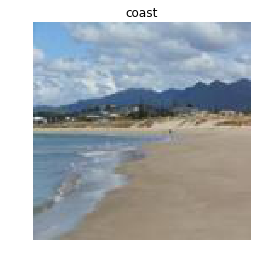

In [15]:
import random
idx = random.randint(0,99)
category = categories[idx]

fnames = os.listdir(os.path.join(TRAIN_PATH, category))
fname = fnames[random.randint(0, len(fnames))]
show(TRAIN_PATH, category, fname)

# Make Model

In [16]:
import h5py
from DeepLearningModels import resnet50
model = resnet50.ResNet50(weights=None, classes=len(categories))

print(model.summary())

# compile the model with crossentropy loss function.
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

# Train the model

In [27]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, batch_size=16, classes=categories, target_size=(224,224))

Found 100000 images belonging to 100 classes.


In [18]:
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(VAL_PATH, classes=categories, target_size=(224, 224))

Found 10000 images belonging to 100 classes.


In [ ]:
saver_cb = keras.callbacks.ModelCheckpoint('my_model-resnet-train-cb-new.h5', monitor='val_loss', verbose=1, save_best_only=True)
model.fit_generator(
        train_generator,
        steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
        epochs=10,
        callbacks=[saver_cb],
        validation_data=val_generator,
        validation_steps=int(val_generator.samples/val_generator.batch_size))

Epoch 1/10


/afs/csail.mit.edu/u/j/jains/6869-places/venv3/lib/python3.4/site-packages/keras/preprocessing/image.py:505: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


5180/6250 [=======================>......] - ETA: 384s - loss: 2.5544 - acc: 0.3412

In [ ]:
model.save('my_model-resnet-train-new.h5')

In [20]:
model = keras.models.load_model('my_model-resnet-train-cb-new.h5')

# Test on Validation Set

In [ ]:
result = model.evaluate_generator(
    val_generator,
    steps=int(val_generator.samples/val_generator.batch_size)
)
print("Loss on validation set:"  + str(result[0]) + " Accuracy on validation set: " + str(result[1]))

# Inference on Test Set

In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(TEST_PATH, target_size=(224,224))

In [ ]:
result = model.predict_generator(
    test_generator,
    steps=int(test_generator.samples/test_generator.batch_size)

In [ ]:
TEST_PATH